In [3]:
# Adaboost 
# scikit-learn中Adaboost类库:AdaBoostClassifier和AdaBoostRegressor两个，AdaBoostClassifier用于分类，AdaBoostRegressor用于回归。

# AdaBoostClassifier使用了两种Adaboost分类算法的实现，SAMME和SAMME.R。
# AdaBoostRegressor则使用了我们原理篇里讲到的Adaboost回归算法的实现，即Adaboost.R2。

# 当我们对Adaboost调参时，主要要对两部分内容进行调参，第一部分是对我们的Adaboost的框架进行调参， 第二部分是对我们选择的弱分类器进行调参。    

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# 免去使用plt.show()
%matplotlib inline     

(900, 2)
(900,)


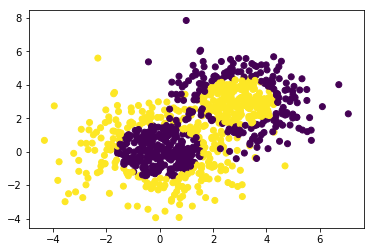

In [13]:
##### 生成样本数据 #####

# make_gaussian_quantitles : 将一个单高斯分布的点集划分为两个数量均等的点集，作为两类

# 生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征，协方差系数为2
X1, y1 = make_gaussian_quantiles(cov=2.0,n_samples=500, n_features=2, n_classes=2, random_state=1)

# 生成2维正态分布，生成的数据按分位数分为两类，400个样本,2个样本特征均值都为3，协方差系数为2
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=400, n_features=2, n_classes=2, random_state=1)

# 将X1，X2上下连接
X = np.concatenate((X1, X2)) 
print(X.shape)

# 将y1，y2上下连接
y = np.concatenate((y1, -y2+1))
print(y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y)

In [6]:
##### 分类器调参 #####

### 对 DecisionTree 进行调参 ###

param_grid = {"max_depth":[1, 2, 3, 4, 5]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=10)
grid.fit(X, y)

# AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
# algorithm="SAMME",
 #                        n_estimators=200, learning_rate=0.8)
print(grid.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [7]:
### 对 Adaboost 进行调参 ###

est_scope = np.logspace(0.1, 1, 5)
lr_scope = np.arange(100, 500 ,5)
param_grid2 = {"n_estimators":lr_scope, "learning_rate":est_scope}
grid2 = GridSearchCV(AdaBoostClassifier(grid.best_estimator_), param_grid=param_grid2, cv=10)
grid2.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': array([  1.25893,   2.11349,   3.54813,   5.95662,  10.     ]), 'n_estimators': array([100, 105, ..., 490, 495])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [8]:
### 打印Adaboost最佳分类器 ###

print(grid2.best_estimator_)
print(grid2.best_score_)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.2589254117941673, n_estimators=145,
          random_state=None)
0.914444444444


[[-5.318675   -5.298675   -5.278675   ..., -4.94706497 -4.94706497
  -4.94706497]
 [-5.318675   -5.298675   -5.278675   ..., -4.92706497 -4.92706497
  -4.92706497]
 [-5.318675   -5.298675   -5.278675   ..., -4.90706497 -4.90706497
  -4.90706497]
 ..., 
 [-5.318675   -5.298675   -5.278675   ...,  8.79293503  8.79293503
   8.79293503]
 [-5.318675   -5.298675   -5.278675   ...,  8.81293503  8.81293503
   8.81293503]
 [-5.318675   -5.298675   -5.278675   ...,  8.83293503  8.83293503
   8.83293503]]
[[-5.318675   -4.94706497]
 [-5.298675   -4.94706497]
 [-5.278675   -4.94706497]
 ..., 
 [ 8.021325    8.83293503]
 [ 8.041325    8.83293503]
 [ 8.061325    8.83293503]]
[[1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]]


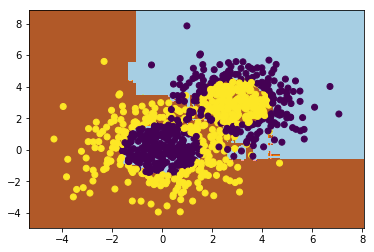

In [14]:
### 画出决策分割线 ###

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
#print(xx.shape)
#print(np.c_[xx.ravel(), yy.ravel()].shape)
print(np.c_[xx, yy])
print(np.c_[xx.ravel(), yy.ravel()])                       # ravel()多维数组降位一维
Z = grid2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

print(Z)

cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)